In [14]:
import os

import matplotlib.pyplot as plt
from tyssue import SheetGeometry as geom
from tyssue.stores import stores_dir
from tyssue.io.hdf5 import load_datasets
from tyssue import config
from tyssue.core.sheet import Sheet
from tyssue.dynamics.sheet_vertex_model import SheetModel as model


h5store = os.path.join(stores_dir, "small_hexagonal_snaped.hf5")

datasets = load_datasets(h5store, data_names=["face", "vert", "edge"])
specs = config.geometry.cylindrical_sheet()
sheet = Sheet("emin", datasets, specs)
geom.update_all(sheet)
sheet.sanitize()
#sheet.get_extra_indices()

In [15]:
model.compute_energy(sheet) - model.compute_energy(sheet2)

-8.149072527885437e-09

In [16]:
h5store = os.path.join(stores_dir, "small_hexagonal.hf5")

datasets = load_datasets(h5store, data_names=["face", "vert", "edge"])
specs = config.geometry.cylindrical_sheet()
sheet2 = Sheet("emin", datasets, specs)

In [17]:
Et2, Ec2, Ev2 = model.compute_energy(sheet2, full_output=True)

In [18]:
Et, Ec, Ev = model.compute_energy(sheet, full_output=True)

In [28]:
Ec[Ec<Ec.min()+1]

face
0     12657.983221
1     12657.983221
2     12657.983221
3     12657.983221
4     12657.983221
5     12657.983221
6     12657.983221
7     12657.983221
8     12657.983221
9     12657.983221
10    12657.983221
11    12657.983221
12    12657.983221
13    12657.983221
14    12657.983221
15    12657.983221
16    12657.983221
17    12657.983221
18    12657.983221
19    12657.983221
20    12657.983221
21    12657.983221
22    12657.983221
23    12657.983221
24    12657.983221
25    12657.983221
26    12657.983221
27    12657.983221
28    12657.983221
29    12657.983221
30    12657.983221
31    12657.983221
32    12657.983221
33    12657.983221
34    12657.983221
35    12657.983221
36    12657.983221
37    12657.983221
38    12657.983221
39    12657.983246
dtype: float64

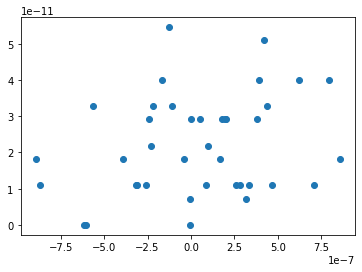

In [38]:
fig, ax = plt.subplots()

ax.plot(Ec2[Ec<Ec.min()+1e-5]-Ec.min(),
        Ec[Ec<Ec.min()+1e-5]-Ec.min(), 'o')



In [39]:
Ec.mean()

12657.983221584556

In [40]:
Ec2.mean()

12657.98322159488

In [ ]:
geom.scale(sheet, sheet.face_df.area**(-0.5), )

In [41]:
h5store = os.path.join(stores_dir, "small_hexagonal.hf5")
datasets = load_datasets(h5store, data_names=["face", "vert", "edge"])
specs = config.geometry.cylindrical_sheet()

sheet = Sheet("emin", datasets, specs)
nondim_specs = config.dynamics.quasistatic_sheet_spec()
dim_model_specs = model.dimensionalize(nondim_specs)
sheet.update_specs(dim_model_specs, reset=True)

geom.update_all(sheet)

Et, Ec, Ev = model.compute_energy(sheet, full_output=True)


Reseting column contractility of the face dataset with new specs
Reseting column vol_elasticity of the face dataset with new specs
Reseting column prefered_height of the face dataset with new specs
Reseting column prefered_area of the face dataset with new specs
Reseting column prefered_vol of the face dataset with new specs
Reseting column radial_tension of the vert dataset with new specs
Reseting column is_active of the vert dataset with new specs
Reseting column ux of the edge dataset with new specs
Reseting column uy of the edge dataset with new specs
Reseting column uz of the edge dataset with new specs
Reseting column line_tension of the edge dataset with new specs
Reseting column is_active of the edge dataset with new specs


In [42]:
h5store = os.path.join(stores_dir, "small_hexagonal.hf5")
datasets = load_datasets(h5store, data_names=["face", "vert", "edge"])
specs = config.geometry.cylindrical_sheet()

sheet_s = Sheet("emin", datasets, specs)
nondim_specs = config.dynamics.quasistatic_sheet_spec()
dim_model_specs = model.dimensionalize(nondim_specs)
sheet_s.update_specs(dim_model_specs, reset=True)

geom.update_all(sheet_s)

Et_s, Ec_s, Ev_s = model.compute_energy(sheet_s, full_output=True)


Reseting column contractility of the face dataset with new specs
Reseting column vol_elasticity of the face dataset with new specs
Reseting column prefered_height of the face dataset with new specs
Reseting column prefered_area of the face dataset with new specs
Reseting column prefered_vol of the face dataset with new specs
Reseting column radial_tension of the vert dataset with new specs
Reseting column is_active of the vert dataset with new specs
Reseting column ux of the edge dataset with new specs
Reseting column uy of the edge dataset with new specs
Reseting column uz of the edge dataset with new specs
Reseting column line_tension of the edge dataset with new specs
Reseting column is_active of the edge dataset with new specs


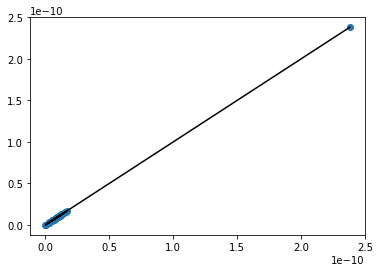

In [44]:
fig, ax = plt.subplots()

ax.plot(Ec_s[Ec_s<Ec_s.min()+1e-5]-Ec_s.min(),
        Ec[Ec_s<Ec_s.min()+1e-5]-Ec_s.min(), 'o')
ax.plot(Ec_s[Ec_s<Ec_s.min()+1e-5]-Ec_s.min(),
        Ec_s[Ec_s<Ec_s.min()+1e-5]-Ec_s.min(), 'k-')


In [46]:
Ec.mean()

0.12093674686179141

In [47]:
Ec_s.mean()

0.12093674686179141

In [48]:
Ev.mean()

0.08788417666060594

In [49]:
energy = model.compute_energy(sheet, full_output=False)

In [50]:
energy

14.254513236339077

In [53]:
from tyssue.topology.sheet_topology import type1_transition

In [62]:
h5store = os.path.join(stores_dir, "small_hexagonal.hf5")
datasets = load_datasets(h5store, data_names=["face", "vert", "edge"])

sheet = Sheet("emin", datasets)
geom.update_all(sheet)
face = sheet.edge_df.loc[84, "face"]
type1_transition(sheet, 84)
geom.update_all(sheet)


In [55]:
sheet.edge_df.loc[84, "face"] != face


False

In [56]:
sheet.edge_df.loc[84, "face"] 

14

In [57]:
from tyssue.draw import sheet_view

In [68]:
%matplotlib qt

sheet_view(sheet, list("zx"), edge={"head_width": 0.1})

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

In [69]:
sheet.validate()

True

In [70]:
sheet.face_df.loc[14, "num_sides"]

5

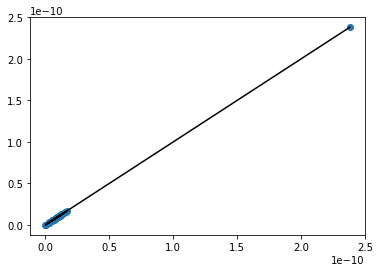

In [45]:
fig, ax = plt.subplots()

ax.plot(Ec_s-Ec_s.min(),
        Ec-Ec_s.min(), 'o')
ax.plot(Ec_s-Ec_s.min(),
        Ec_s-Ec_s.min(), 'k-')


In [42]:
sheet.vert_df[["x", "y", "z"]] += np.random.normal(scale=1e-10, size=(sheet.Nv, 3))
geom.update_all(sheet)

In [43]:
sheet.get_extra_indices()

In [44]:
from tyssue.io.hdf5 import save_datasets

In [45]:
save_datasets("../tyssue/tyssue/stores/small_hexagonal.hf5", sheet)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

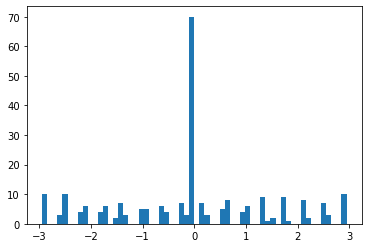

In [10]:
H = plt.hist(
    np.arctan2(
        sheet.edge_df["dy"], 
        sheet.edge_df["dx"]
    ),
    60

)

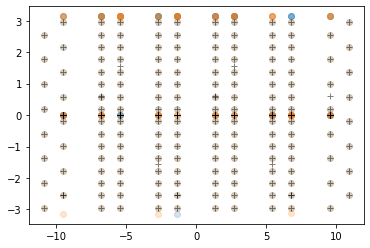

In [41]:
plt.plot(
    sheet.edge_df["sz"],
    np.arctan2(
        sheet.edge_df["dy"], 
        sheet.edge_df["dx"]+np.random.normal(scale=1e-6, size=sheet.Ne)
    ), 'o', alpha=0.2
)

plt.plot(
    sheet.edge_df["sz"],
    np.arctan2(
        sheet.edge_df["dy"], 
        sheet.edge_df["dx"]
        +np.random.normal(scale=1e-12, size=sheet.Ne)
    ), 'o', alpha=0.2
)


plt.plot(
    sheet.edge_df["sz"],
    np.arctan2(
        sheet.edge_df["dy"], 
        sheet.edge_df["dx"]),
    'k+', alpha=0.5
)




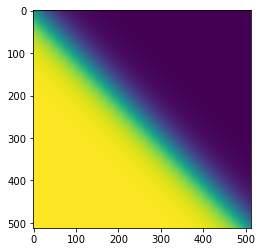

In [25]:
fig, ax = plt.subplots()

xx, yy = np.meshgrid(
    np.logspace(-12, -6, 512),
    np.logspace(-12, -6, 512)
)
ax.imshow(np.arctan2(yy, xx))


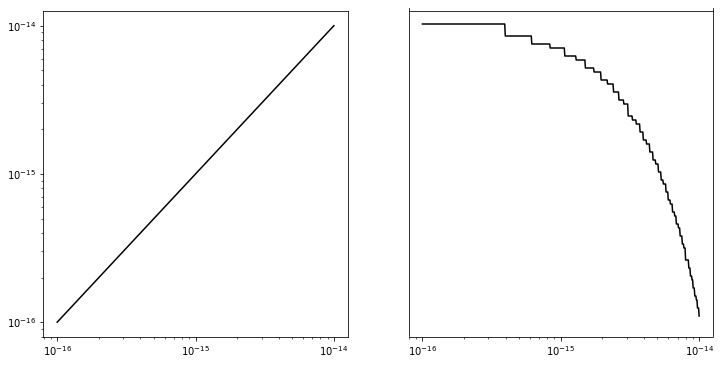

In [40]:
fig, (ax0, ax1) = plt.subplots(1, 2)
x = np.logspace(-16, -14, 512)


ax0.plot(x, np.arctan2(x, np.ones(512)), 'k-')
ax1.plot(x, np.arctan2(np.ones(512), x), 'k-')
ax0.set_xscale("log")
ax1.set_xscale("log")
ax0.set_yscale("log")
ax1.set_yscale("log")

fig.set_size_inches(12, 6)

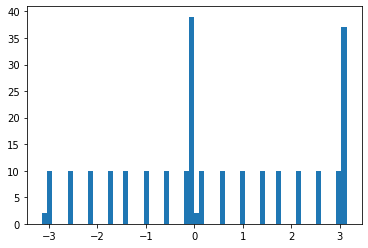

In [13]:
H = plt.hist(
    np.arctan2(
        sheet.edge_df["dy"], 
        sheet.edge_df["dx"]+np.random.normal(scale=1e-6, size=sheet.Ne)
    ),
    60
)

In [2]:
theta = np.arctan2(
    self.edge_df.loc[self.dble_edges, "dy"],
    self.edge_df.loc[self.dble_edges, "dx"]+np.,
)


NameError: name 'np' is not defined

In [2]:
import tempfile
from tyssue.generation import three_faces_sheet
from tyssue import Sheet
from tyssue.io import csv, obj, off, ais


sheet = Sheet('test', *three_faces_sheet())
fh = tempfile.mktemp(suffix='.csv')
csv.write_storm_csv(fh, sheet.vert_df[sheet.coords])
with open(fh) as fb:
    lines = fb.readlines()
assert len(lines) == 14
assert 'frame' in lines[0]

In [3]:
fh = tempfile.mktemp(suffix='.obj')
obj.save_junction_mesh(fh, sheet)
with open(fh) as fb:
    lines = fb.readlines()
assert len(lines) == 35
assert '# 13 vertices' in lines[4]

                be advised the file cannot be read back in vispy


In [32]:
from tyssue.generation import extrude
from tyssue import Monolayer, config
datasets, specs = three_faces_sheet()

extruded = extrude(datasets, method='translation')
mono = Monolayer('test', extruded,
                 config.geometry.bulk_spec())


In [6]:
from tyssue.draw.plt_draw import quick_edge_draw, sheet_view

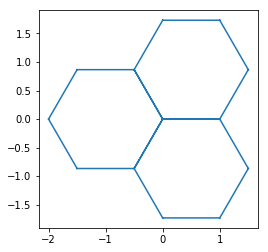

In [16]:
fig, ax = quick_edge_draw(sheet)
assert ax.lines[0].get_xydata().shape == (54, 2)


In [12]:
line = ax.lines[0]

In [15]:
line.get_xydata().shape

(54, 2)